In [4]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [5]:
# Visualize Tractor Sales data as time series
from io import StringIO
import requests
import os
print(os.getcwd())
os.chdir('C:\\Users\\Vikas Bhardwaj\\Desktop\\DATA SCIENCE\\Datasets\\Datasets')

C:\Users\Vikas Bhardwaj


In [88]:
sales_data = pd.read_csv('PH-Sales.csv')  
sales_data.head(5)


,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [89]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [8]:

import calendar
sales_data['Month'] = dates.month
sales_data.head(4)


,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4


In [9]:
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data.head(5)

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,Jan
1,Feb-03,157,Feb
2,Mar-03,185,Mar
3,Apr-03,199,Apr
4,May-03,203,May


In [10]:

sales_data['Year'] = dates.year
sales_data.head(15)

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003
5,Jun-03,189,Jun,2003
6,Jul-03,207,Jul,2003
7,Aug-03,207,Aug,2003
8,Sep-03,171,Sep,2003
9,Oct-03,150,Oct,2003


In [11]:
sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.head(5)

,Number of Tractor Sold,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [12]:
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data.head(5)

,Tractor-Sales,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [13]:
sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]
sales_data.head(5)



,Month,Year,Tractor-Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [14]:

# set the dates as the index of the dataframe, so that it can be treated as a 
# time-series dataframe
sales_data.set_index(dates, inplace=True)
sales_data.head(5)
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [15]:
# extract out the time-series
sales_ts = sales_data['Tractor-Sales']
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tractor Sales')

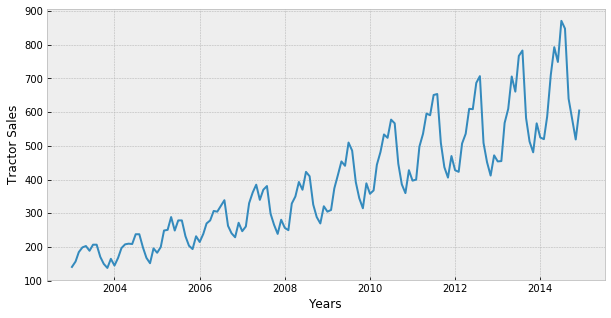

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')
#mean as well as variance both are variing
# its not a stationary graph
#this is trend of ph over the  years

In [17]:
#PH Trend - Time Series Decomposition
# remove wrinkles from our time series using moving average. 
# moving average of different time periods i.e. 4,6,8, and 12 months 

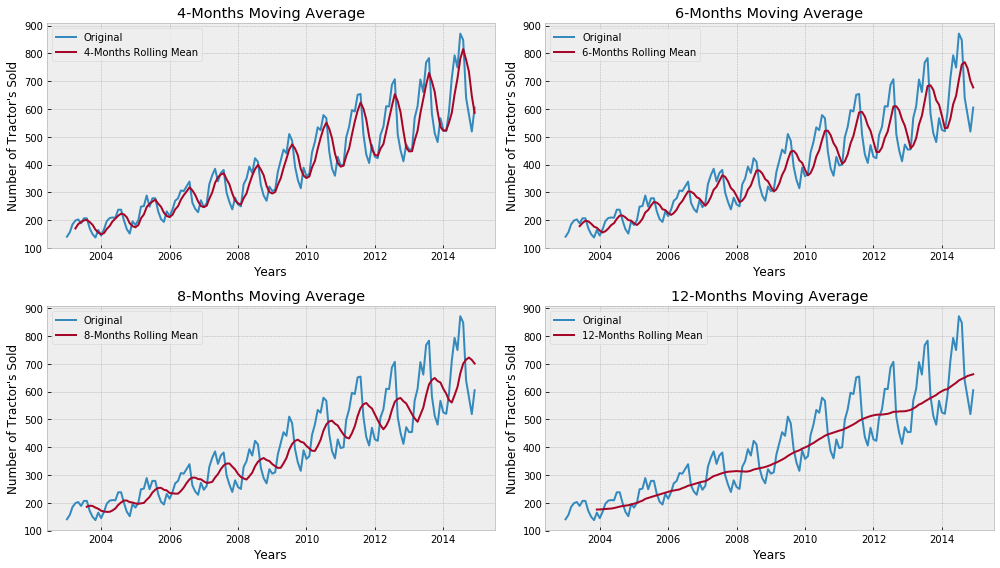

In [18]:
# PH Trend - Time Series Decomposition
# remove wrinkles from our time series using moving average. 
# moving average of different time periods i.e. 4,6,8, and 12 months 
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [19]:
#12-month moving average produces a wrinkle free curve. 
# There is expected monthly-seasonal effect in our data.'''

In [20]:
# plot the rolling mean and standard deviation on window of 12 months.
# Determing rolling statistics
rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()

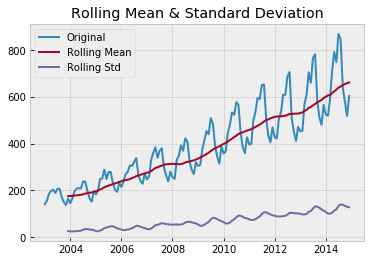

In [21]:
#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [22]:

# PH Tractor - Dicky Fuller Test on the timeseries 
# run the Dicky Fuller Test on the timeseries and 
# verify the null hypothesis that the TS is non-stationary.
# Perform Dickey-Fuller test:

In [23]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
dfoutput
dftest


Results of Dickey-Fuller Test:


(1.1088250591467301,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [24]:
dfoutput

Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
dtype: float64

In [25]:
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

In [26]:
# Though the variation in standard deviation is small, 
# rolling mean is clearly increasing with time and 
# this is not a stationary series. 
# we observe the moving average over months that there is a monhly pattern,



In [27]:
#H Tractor Seasonality â€“ Time Series Decomposition
# The first thing to do is to see how number of tractors sold vary on a 
# month on month basis. plot a stacked annual plot to observe seasonality
sales_data.head()


,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [28]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data


Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [29]:

monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data



Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


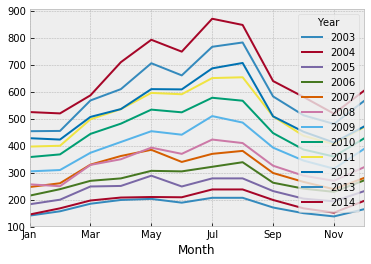

In [30]:
monthly_sales_data.plot()



In [31]:
yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


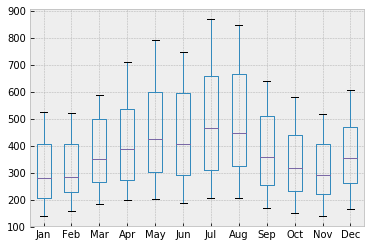

In [32]:
yearly_sales_data.boxplot()


# Important Inferences
# The tractor sales have been increasing without fail every year.
# July and August are the peak months for tractor sales and the variance and 
# the mean value in July and August are also much higher than any of the 
# other months.
# We can see a seasonal cycle of 12 months where the mean value of each month 
# starts with a increasing trend in the beginning of the year and drops down 
# towards the end of the year. We can see a seasonal effect with a cycle of 
# 12 months.'''


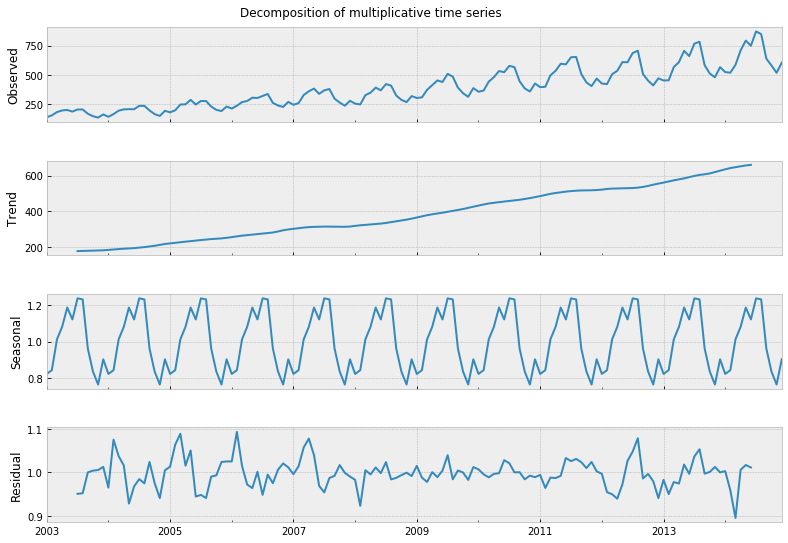

In [33]:
# PH Tractor Irregular Remainder
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()


# Importing the originl data

In [34]:
# PH Arima Modeling
# convert to a dataframe for easy plot and differenciation
random_df = pd.read_csv('dummy-sales.csv')
random_df.head(5)

,Month,Sales
0,1,266.0
1,2,145.9
2,3,183.1
3,4,119.3
4,5,180.3


In [35]:
random_df.set_index(pd.date_range(start='2012-01-01', freq='MS', periods=len(random_df)), inplace=True)
random_df.head(5)



,Month,Sales
2012-01-01,1,266.0
2012-02-01,2,145.9
2012-03-01,3,183.1
2012-04-01,4,119.3
2012-05-01,5,180.3


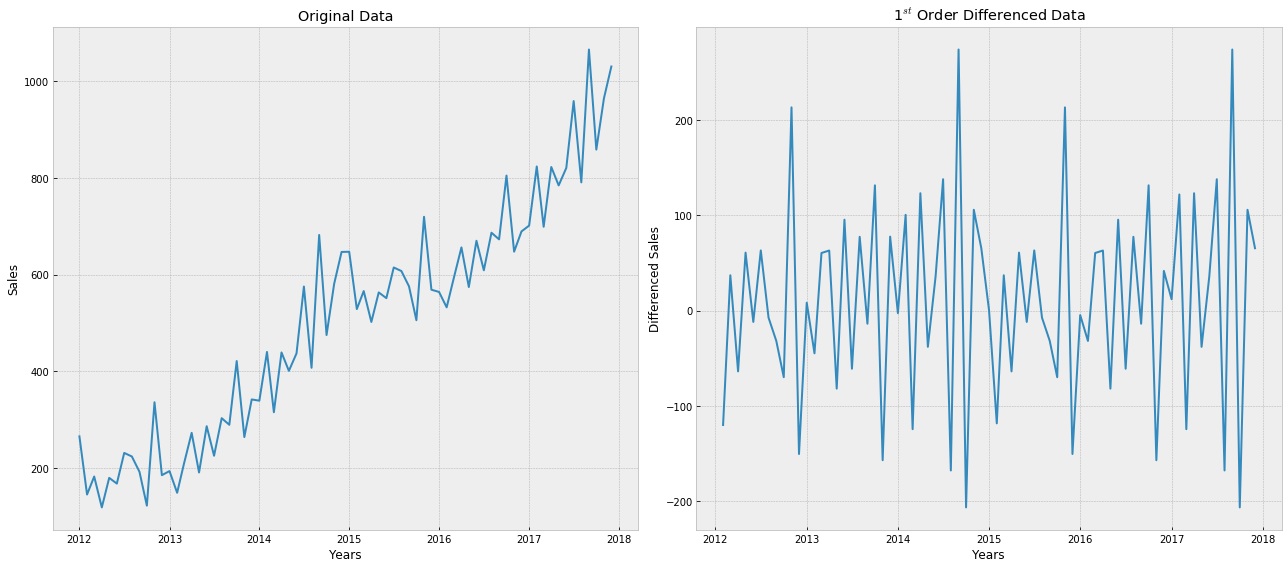

In [36]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(18)
fig.set_figheight(8)
axes[0].plot(random_df.index, random_df['Sales'])
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Sales")
axes[0].set_title("Original Data")
#second plot
axes[1].plot(random_df.index, random_df['Sales'].diff(periods=1))
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Differenced Sales")
axes[1].set_title("1$^{st}$ Order Differenced Data")
plt.tight_layout()
plt.show()

# The residual data of most time series usually become trend-less after 
# the first order differencing which is represented as ARIMA(0,1,0). 
# Notice, AR (p), and MA (q) values in this notation are 0 and 
# the integrated (I) value has order one. If the residual series still has a 
# trend it is further differenced and is called 2nd order differencing. 
# This trend-less series is called stationary on mean series 
# i.e. mean or average value for series does not change over time.'''


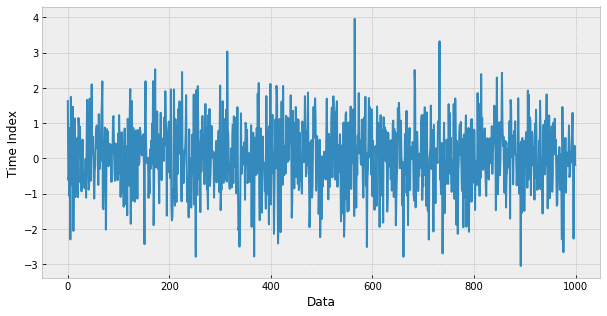

In [37]:
# 2nd Pass of ARIMA to Extract Juice / Information
# White Noise & Arim
# generate white noise
np.random.seed(1)
# plot of discrete white noise
plt.figure(figsize=(10, 5))
#????????????????????????????????????????????????????????
white_noise = np.random.normal(size=1000)
plt.plot(white_noise)
plt.xlabel('Data')
plt.ylabel('Time Index')
plt.show()




Text(0, 0.5, 'Tractor Sales')

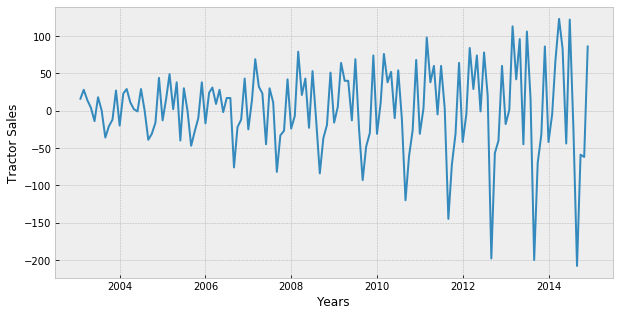

In [38]:

# Step 2: Difference data to make data stationary on mean (remove trend)

plt.figure(figsize=(10, 5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')


Text(0, 0.5, 'Log (Tractor Sales)')

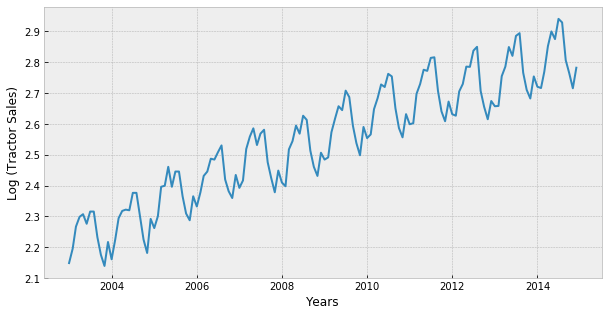

In [39]:
# Step 3: log transform data to make data stationary on variance
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')




Text(0, 0.5, 'Differenced Log (Tractor Sales)')

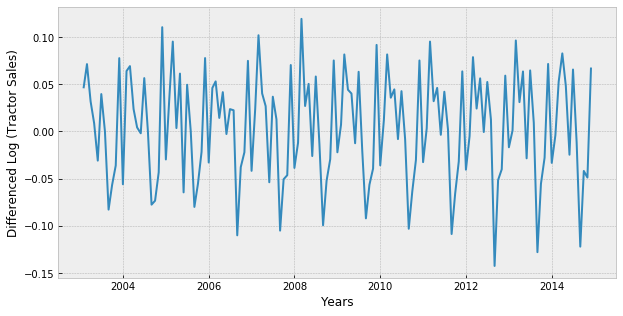

In [40]:
# Step 4: Difference log transform data to make data stationary on both mean and 
# variance 
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')



In [41]:
# Step 5: Plot ACF and PACF to identify potential AR and MA model
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)
sales_ts_log.head(5)



2003-01-01    2.149219
2003-02-01    2.195900
2003-03-01    2.267172
2003-04-01    2.298853
2003-05-01    2.307496
Freq: MS, Name: Tractor-Sales, dtype: float64

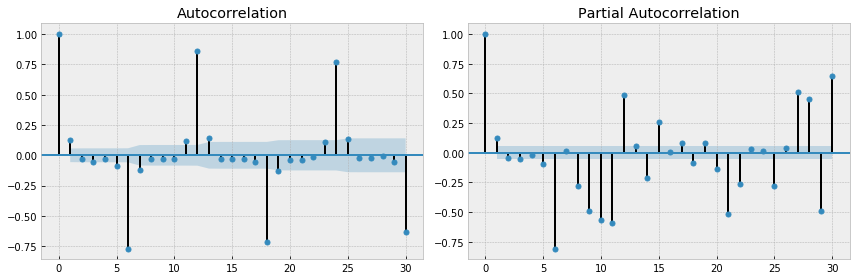

In [42]:
 # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff = sales_ts_log.diff(periods=1)
sales_ts_log_diff.dropna(inplace=True)
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()



In [43]:
# Step 6: Identification of best fit ARIMA model
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
#Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [44]:
# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:680.8676762086543
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-372.9562269752224
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-417.405467519565
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-464.9279544049724
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-521.7351200161946
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:489.66263927054086
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-479.0566403315612
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-497.6949250561339
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-519.920115542699
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-573.949774832278
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-414.12354404598966
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-524.3695631654234
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-653.8835272882111
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-686.3991111742228
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-690.9523310855043
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-719.1574277481297
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-676.2157567486265
SARIMAX(0, 1, 0)x

In [53]:
# Step 7: Predict sales on in-sample date using the best fit ARIMA model
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()
print(best_results.summary().tables[0])


                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 370.887
Date:                            Sat, 03 Aug 2019   AIC                           -733.775
Time:                                    22:44:30   BIC                           -721.923
Sample:                                01-01-2003   HQIC                          -728.959
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         


In [54]:
print(best_results.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3572      0.069     -5.192      0.000      -0.492      -0.222
ar.S.L12       0.9933      0.006    176.415      0.000       0.982       1.004
ma.S.L12      -0.5534      0.097     -5.734      0.000      -0.743      -0.364
sigma2         0.0003   2.73e-05      9.220      0.000       0.000       0.000


In [55]:

pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()



In [56]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
sales_ts_forecasted

2012-01-01    2.645103
2012-02-01    2.652880
2012-03-01    2.742196
2012-04-01    2.775308
2012-05-01    2.818542
2012-06-01    2.807913
2012-07-01    2.853030
2012-08-01    2.849088
2012-09-01    2.747071
2012-10-01    2.686218
2012-11-01    2.653954
2012-12-01    2.725221
2013-01-01    2.695281
2013-02-01    2.703006
2013-03-01    2.791725
2013-04-01    2.824616
2013-05-01    2.867560
2013-06-01    2.857002
2013-07-01    2.901817
2013-08-01    2.897902
2013-09-01    2.796567
2013-10-01    2.736121
2013-11-01    2.704073
2013-12-01    2.774863
2014-01-01    2.745123
2014-02-01    2.752797
2014-03-01    2.840923
2014-04-01    2.873593
2014-05-01    2.916251
2014-06-01    2.905763
2014-07-01    2.950278
2014-08-01    2.946389
2014-09-01    2.845732
2014-10-01    2.785690
2014-11-01    2.753856
2014-12-01    2.824174
Freq: MS, dtype: float64

In [57]:
sales_ts_truth = sales_ts_log['2012-01-01':]
sales_ts_truth 


2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
2012-06-01    2.784617
2012-07-01    2.836957
2012-08-01    2.849419
2012-09-01    2.706718
2012-10-01    2.655138
2012-11-01    2.614897
2012-12-01    2.673942
2013-01-01    2.657056
2013-02-01    2.658011
2013-03-01    2.754348
2013-04-01    2.785330
2013-05-01    2.848805
2013-06-01    2.820201
2013-07-01    2.884795
2013-08-01    2.893762
2013-09-01    2.765669
2013-10-01    2.710117
2013-11-01    2.682145
2013-12-01    2.753583
2014-01-01    2.720159
2014-02-01    2.716003
2014-03-01    2.768638
2014-04-01    2.851258
2014-05-01    2.899273
2014-06-01    2.874482
2014-07-01    2.940018
2014-08-01    2.928396
2014-09-01    2.806180
2014-10-01    2.764176
2014-11-01    2.715167
2014-12-01    2.781755
Freq: MS, Name: Tractor-Sales, dtype: float64

In [58]:
# Compute the mean square error
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0011


In [59]:
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
# The Mean Squared Error of our forecasts is 0.0011


The Mean Squared Error of our forecasts is 0.0011


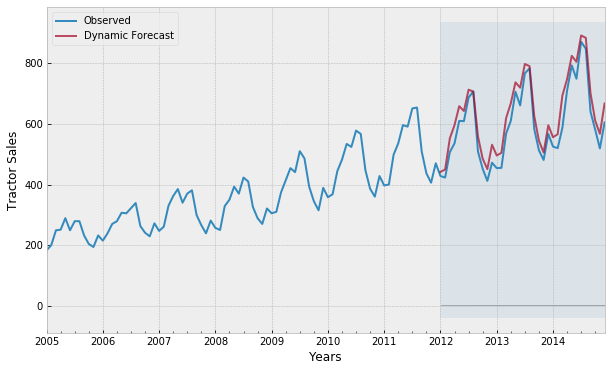

In [60]:
axis = sales_ts['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [61]:
# Step 8: Forecast sales using the best fit ARIMA model
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [62]:
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()


,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.460414,528.219083,609.616979,528.219083,609.616979
2015-01-01,566.200556,519.964396,616.548118,519.964396,616.548118
2015-02-01,668.825569,607.091050,736.837813,607.091050,736.837813
2015-03-01,755.210720,678.412421,840.702814,678.412421,840.702814
2015-04-01,850.231922,756.568699,955.490655,756.568699,955.490655


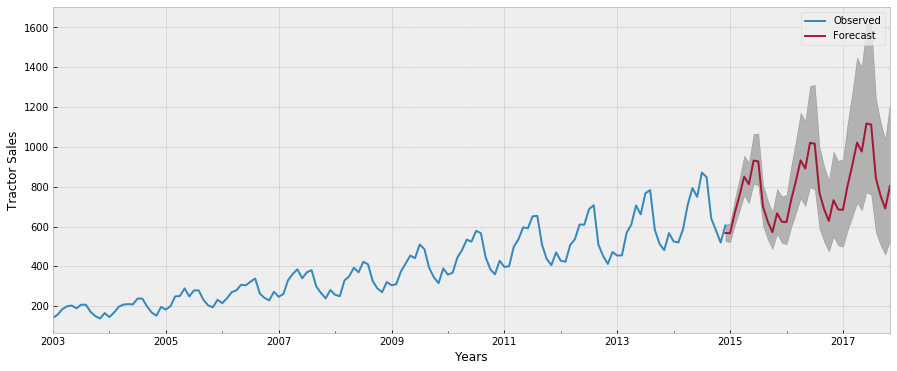

In [63]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.9)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()


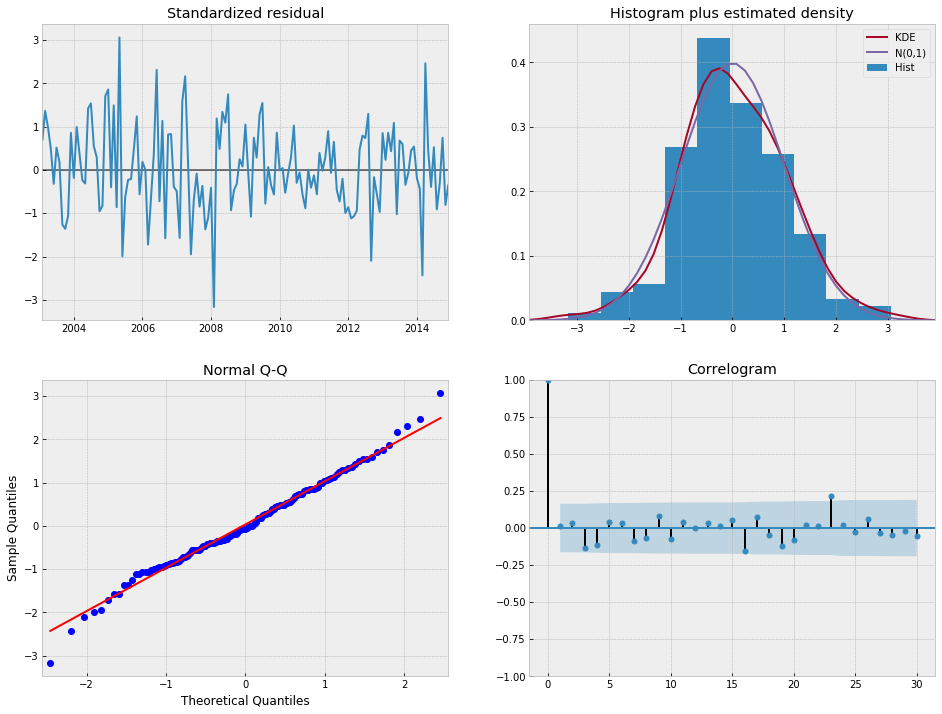

In [64]:
# Step 9: Plot ACF and PACF for residuals of ARIMA model to ensure no residual of our model is
#uncorellated and normallly distributed with zero mean if it not that it signifies
#the model can be further signifie repeat process with residuals
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()


# #Step 10: Regression with ARIMA Errors

In [65]:

# Step 10: Regression with ARIMA Errors 
mkt_sales_data = pd.read_csv('sales-and-marketing.csv')
mkt_sales_data.head()


,Time Period,Sales,Marketing Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15


In [66]:
#since the complete date was not mentioned, assume that it was 
# the first of every month
mkt_sales_data.set_index(pd.date_range(start='2011-01-01', freq='MS', periods=len(mkt_sales_data)), inplace=True)
mkt_sales_data.head()



,Time Period,Sales,Marketing Expense
2011-01-01,Jan-11,397,486.64
2011-02-01,Feb-11,400,501.80
2011-03-01,Mar-11,498,437.09
2011-04-01,Apr-11,536,565.16
2011-05-01,May-11,596,744.15


In [67]:

mkt_sales_data.drop(['Time Period'], axis=1, inplace=True)
mkt_sales_data.head()


,Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


In [68]:
mkt_sales_data.rename(columns={'Sales':'Tractor-Sales'}, inplace=True)
mkt_sales_data.head(5)



,Tractor-Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


Correlation for Marketing Data: 0.8


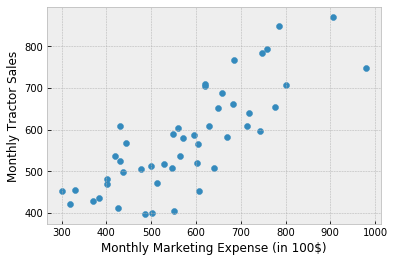

In [69]:
# plot the following scatter plot of same months marketing expense and 
# tractors sales.
plt.figure()
plt.scatter(x=mkt_sales_data['Marketing Expense'], y=mkt_sales_data['Tractor-Sales'])
plt.xlabel('Monthly Marketing Expense (in 100$)')
plt.ylabel('Monthly Tractor Sales')
print("Correlation for Marketing Data: {}".format(round(mkt_sales_data.corr()['Marketing Expense']['Tractor-Sales'], 2)))
# The following is the correlation plot for stationary data:

In [70]:
# The following is the correlation plot for stationary data:

mkt_sales_data_diff = mkt_sales_data.diff(periods=1)
mkt_sales_data_diff.dropna(inplace=True)
mkt_sales_data_diff.head()


,Tractor-Sales,Marketing Expense
2011-02-01,3.0,15.16
2011-03-01,98.0,-64.71
2011-04-01,38.0,128.07
2011-05-01,60.0,178.99
2011-06-01,-5.0,-195.41


Correlation for Stationary Data: 0.41


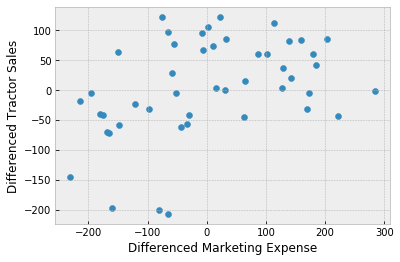

In [71]:
plt.figure()
plt.scatter(x=mkt_sales_data_diff['Marketing Expense'], y=mkt_sales_data_diff['Tractor-Sales'])
plt.xlabel('Differenced Marketing Expense')
plt.ylabel('Differenced Tractor Sales')
print("Correlation for Stationary Data: {}".format(round(mkt_sales_data_diff.corr()['Marketing Expense']['Tractor-Sales'], 2)))



In [2]:

# near perfect correlation has now disappeared though there is still some 
# correlation in this data ( Ï  = 0.41).
# Typically, the marketing effort for the previous few months needs to have a 
# good correlation with sales for an effective marketing program. 

